In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
combined_balanced_df = pd.read_csv('../data/processed/combined_balanced.csv')

In [3]:
combined_balanced_df.columns

Index(['Unnamed: 0', 'clean_text', 'has_toxicity'], dtype='object')

train/test split

In [5]:
X = combined_balanced_df['clean_text']
y = combined_balanced_df['has_toxicity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Проверка размера
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 32612, Test size: 8154


vectorization

In [6]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

logistic regression

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0     0.8641    0.9313    0.8965      4077
           1     0.9255    0.8536    0.8881      4077

    accuracy                         0.8924      8154
   macro avg     0.8948    0.8924    0.8923      8154
weighted avg     0.8948    0.8924    0.8923      8154



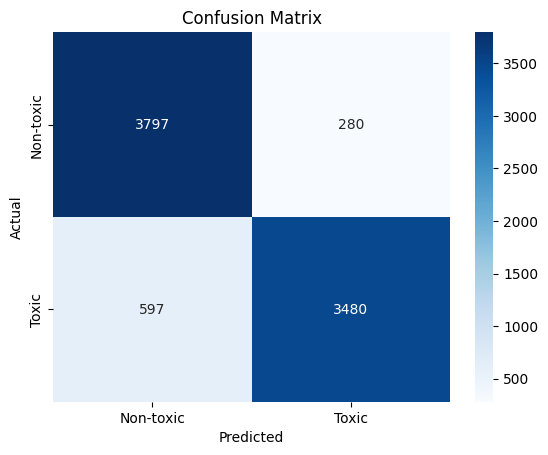

In [8]:
# Отчёт по метрикам
print(classification_report(y_test, y_pred, digits=4))

# Матрица ошибок (confusion matrix)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-toxic', 'Toxic'], yticklabels=['Non-toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
import joblib 

joblib.dump(model, '../models/logreg_model.pkl')
joblib.dump(vectorizer, '../models/tfidf_vectorizer.pkl')

['../models/tfidf_vectorizer.pkl']

In [38]:
df = pd.read_csv('../data/processed/kazakh_cleaned_bit.csv')
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'clean_text', 'has_toxicity',
       'kk_clean_text', 'needs_check'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0.1   2463 non-null   int64 
 1   Unnamed: 0     2463 non-null   int64 
 2   clean_text     2463 non-null   object
 3   has_toxicity   2463 non-null   int64 
 4   kk_clean_text  2463 non-null   object
 5   needs_check    2463 non-null   bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 98.7+ KB


In [ ]:
X = df['kk_clean_text']
y = df['has_toxicity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 1970, Test size: 493


In [42]:
vectorizer_kk = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_train_tfidf = vectorizer_kk.fit_transform(X_train)
X_test_tfidf = vectorizer_kk.fit_transform(X_test)

In [43]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [44]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5269    0.6875    0.5966       256
           1     0.4969    0.3333    0.3990       237

    accuracy                         0.5172       493
   macro avg     0.5119    0.5104    0.4978       493
weighted avg     0.5125    0.5172    0.5016       493



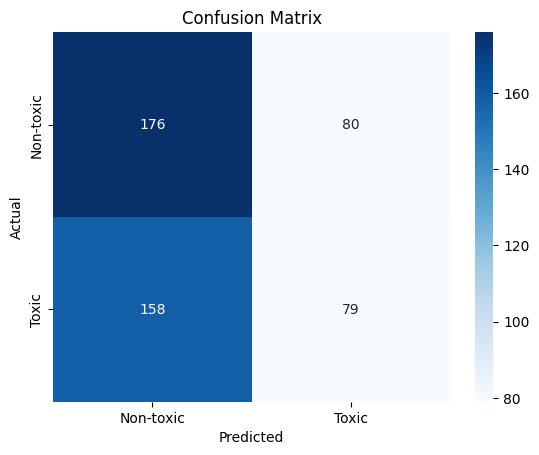

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-toxic', 'Toxic'], yticklabels=['Non-toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()